In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#IMPORTING THE DATASET
sales = pd.read_csv('Salesstore.csv')

In [3]:
sales.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [4]:
#NAMES OF ALL THE COLUMNS
sales.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

In [5]:
sales.shape

(730, 13)

In [6]:
len(sales['Order_ID'].unique())

571

In [7]:
len(sales['Product_Name'].unique())

445

Since, the unique number of Order_ID and Product_Name are very large, it can be concluded that they donot give any significant information about the dataset. Hence, these can be removed from the dataset.

In [8]:
#Saving the Order ID and Product Name in the sequence of application in another dataframe
sales_id = sales['Order_ID']
sales_pname = sales['Product_Name']
#Dropping Order ID and product name from Featureset
sales=sales.drop(columns='Order_ID')
sales=sales.drop(columns='Product_Name')
sales.columns

Index(['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit',
       'Customer_Name', 'Region', 'Customer_Segment', 'Product_Category',
       'Product_Sub-Category', 'Product_Container'],
      dtype='object')

###Continuous Columns

In [9]:
num_cols = sales._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(sales[i].unique())) > int(sales.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['Order_Quantity', 'Sales', 'Profit']


###Categorical Columns

In [10]:
cat_cols = list(set(sales.columns) - set(cont_cols))
cat_cols

['Order_Priority',
 'Customer_Name',
 'Region',
 'Product_Container',
 'Ship_Mode',
 'Product_Sub-Category',
 'Product_Category',
 'Customer_Segment']

In [11]:
sales.describe()

,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000
mean,24.857534,1502.777653,207.479233
std,14.182970,2893.936648,878.631028
min,1.000000,8.600000,-4437.910000
25%,13.000000,171.098375,-77.132500
50%,25.000000,438.700000,0.035000
75%,37.000000,1480.855000,180.000000
max,50.000000,27663.920000,8417.570000


## **UNIVARIATE** **ANALYSIS**

###SHIP MODE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Regular Air    579
Express Air    151
Name: Ship_Mode, dtype: int64

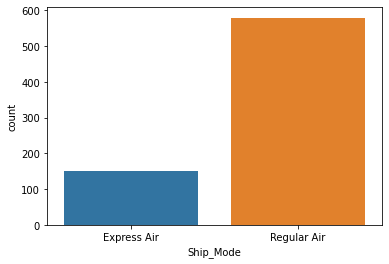

In [12]:
sns.countplot(sales.Ship_Mode)
sales.Ship_Mode.value_counts()

Regular Air(579) is used more frequently than Express Air(151) for shipping.

###REGION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: Region, dtype: int64

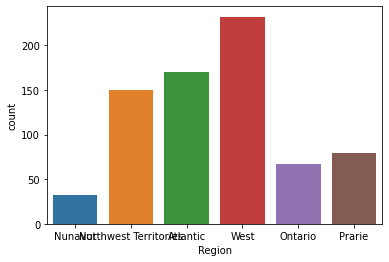

In [13]:
sns.countplot(sales.Region)
sales.Region.value_counts()

Most number of purchases are from West region followed by Atlantic and Northwest Territories.
Least number of purchases are fron Nunavut region.

###CUSTOMER SEGMENT

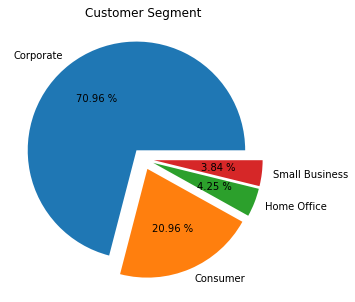

Corporate         518
Consumer          153
Home Office        31
Small Business     28
Name: Customer_Segment, dtype: int64

In [14]:
plt.figure(figsize = (5,5))
corp = sales.loc[sales['Customer_Segment'] == 'Corporate'].count()[0]
cons = sales.loc[sales['Customer_Segment'] == 'Consumer'].count()[0]
hoff = sales.loc[sales['Customer_Segment'] == 'Home Office'].count()[0]
sbiz = sales.loc[sales['Customer_Segment'] == 'Small Business'].count()[0]
explode = (0.1, 0.1, 0.1, 0.1)
labels = ['Corporate', 'Consumer', 'Home Office', 'Small Business']
plt.pie([corp, cons, hoff, sbiz], labels = labels, autopct = '%.2f %%', explode = explode)
plt.title("Customer Segment")
plt.show()

sales.Customer_Segment.value_counts()

Segmentwise, most number of purchases are from Corporate sector while the least from Small Business.

###PRODUCT CATEGORY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Office Supplies    447
Technology         185
Furniture           98
Name: Product_Category, dtype: int64

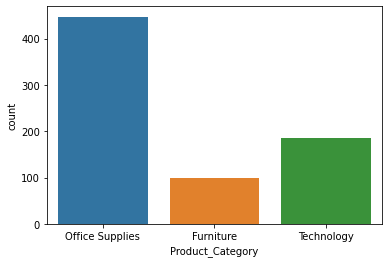

In [15]:
sns.countplot(sales.Product_Category)
sales.Product_Category.value_counts()

Most number of purchased goods belong to Office Supplies Category.

###PRODUCT CONTAINER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Small Box     606
Large Box      63
Medium Box     61
Name: Product_Container, dtype: int64

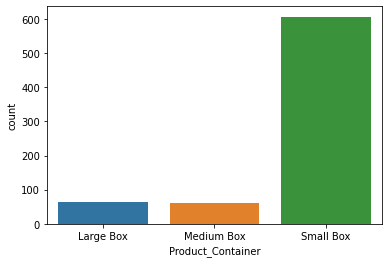

In [16]:
sns.countplot(sales.Product_Container)
sales.Product_Container.value_counts()

Most number of products were shipped in small boxes.

###PRIORITY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: Order_Priority, dtype: int64

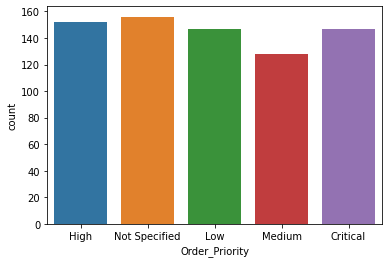

In [17]:
sns.countplot(sales.Order_Priority)
sales.Order_Priority.value_counts()

###ORDER QUANTITY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


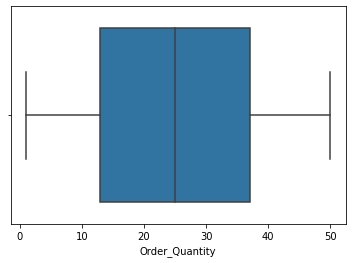

In [18]:
sns.boxplot(sales['Order_Quantity'])

Order quantity of most products lies between 12-38. The median of Order quantity is approximately 25.

## **BIVARIATE** **ANALYSIS**

###SALES IN DIFFERENT REGIONS

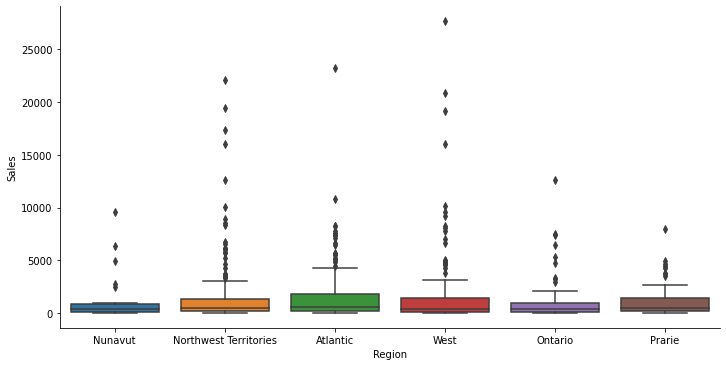

In [19]:
sns.catplot(x = "Region", y = "Sales", data = sales, kind = "box", height=5, aspect=10/5)

Most sales are observed in West region while the least in Prarie region.

In [20]:
sales.Profit.describe()

count     730.000000
mean      207.479233
std       878.631028
min     -4437.910000
25%       -77.132500
50%         0.035000
75%       180.000000
max      8417.570000
Name: Profit, dtype: float64

In [21]:
sales.Sales.describe()

count      730.000000
mean      1502.777653
std       2893.936648
min          8.600000
25%        171.098375
50%        438.700000
75%       1480.855000
max      27663.920000
Name: Sales, dtype: float64

###PROFIT VS SALES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


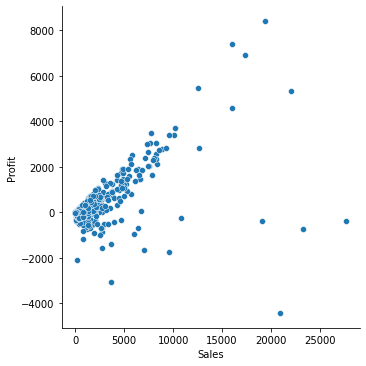

In [22]:
sns.relplot('Sales', 'Profit', data = sales)

For most of the purchases, the profit is increasing with increasing sales. Hence, there is a positive correlation between sales nd profit. Most sales lie between 0 and 10000.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


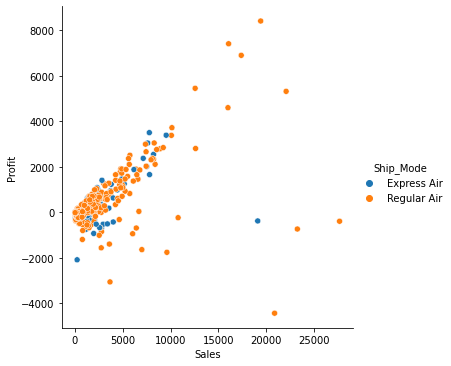

In [23]:
sns.relplot('Sales', 'Profit', data = sales, hue = 'Ship_Mode')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


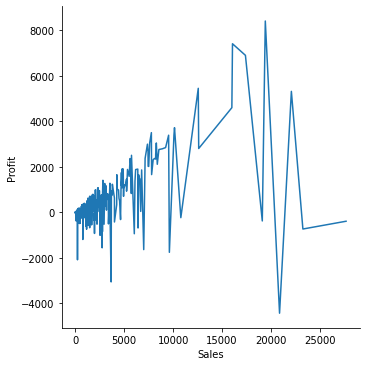

In [24]:
sns.relplot('Sales', 'Profit', data = sales, kind = 'line')

###PROFIT VS PRODUCT CATEGORY

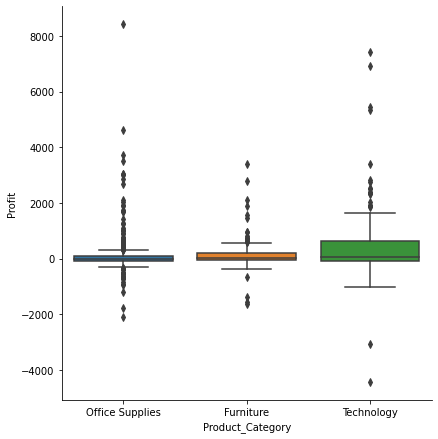

In [25]:
sns.catplot(x = 'Product_Category', y = 'Profit', data = sales, kind = 'box', height = 6)

Highest profit is obtained in Technology products.

###PROFIT FROM DIFFERENT REGIONS

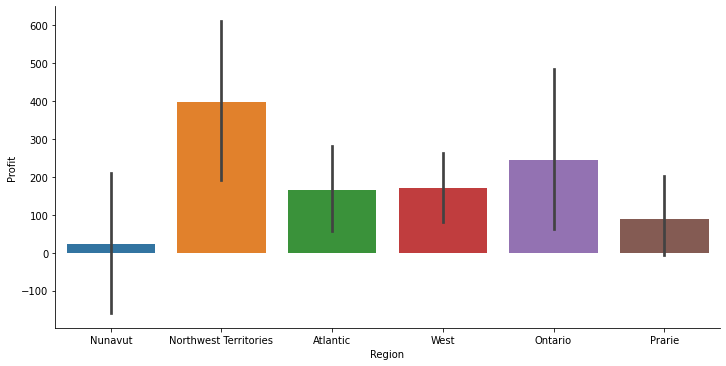

In [26]:
sns.catplot(x = 'Region', y = 'Profit', data = sales, kind = 'bar', aspect= 10/5)

Highest profit is earned from Northwest territories, followed by Ontario. Since, the least number of purchases are from Nunavut region, hence the profit from this region is the least.

###PRODUCT CATEGORY VS PRODUCT CONTAINER

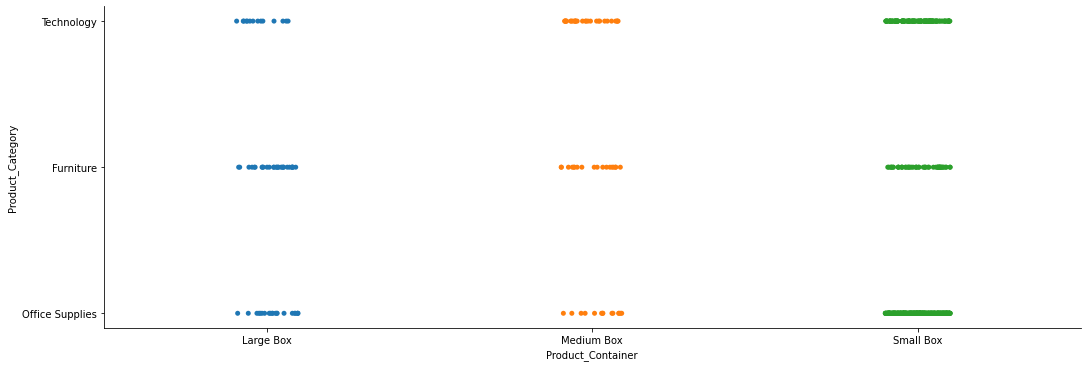

In [27]:
sns.catplot(x="Product_Container", y="Product_Category", data=sales, aspect = 15/5)

Small Boxes are used for all categories of products.
Medium Boxes are mostly used for Technology products.
Large Boxes are mostly used for shipping Furniture.

###REGION VS PRODUCT CATEGORY

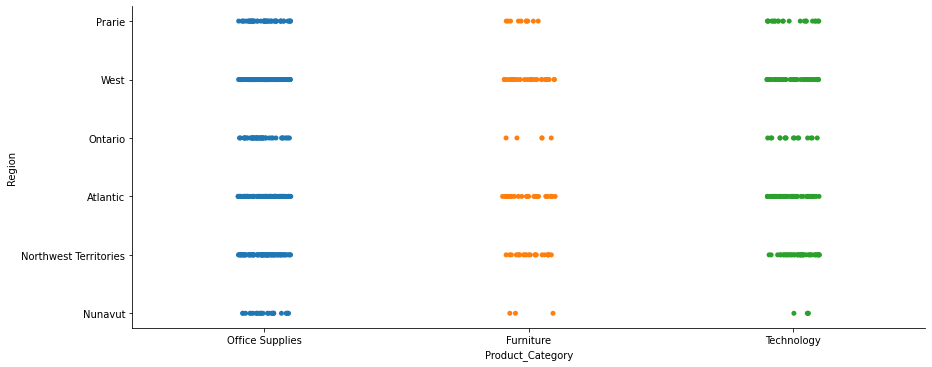

In [28]:
sns.catplot(x="Product_Category", y="Region", data=sales, aspect = 18/7)

###DISTRIBUTION PLOT FOR PROFIT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


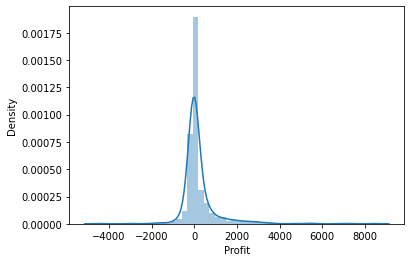

In [29]:
sns.distplot(sales.Profit)

Highest density of profit lies between -77 to 180

###CUSTOMER SEGMENT WISE DISTRIBUTION OF PRODUCT CATEGORY AND SALES

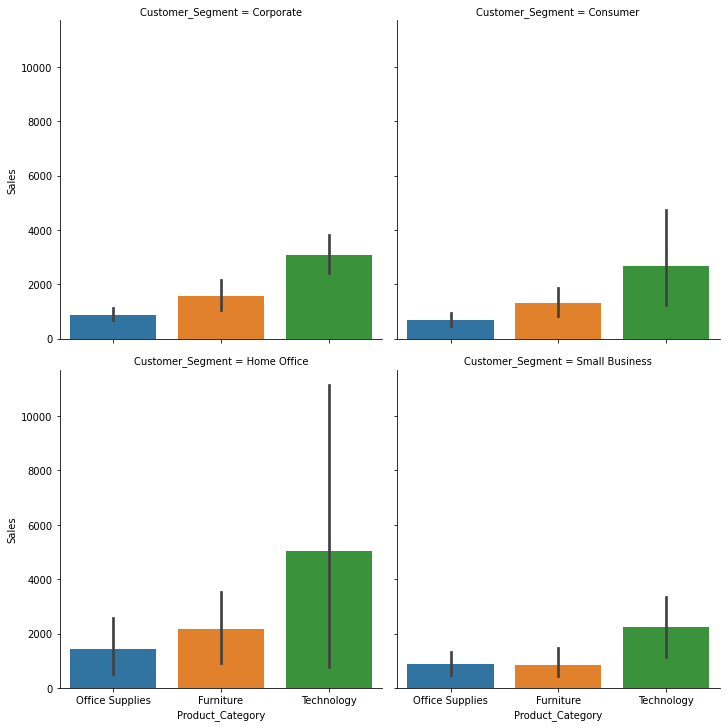

In [30]:
sns.catplot(x = 'Product_Category', y = 'Sales', data = sales, kind = 'bar', col= "Customer_Segment", col_wrap=2)

In all Customer Segments, the highest sales are from Technology products.

###CUSTOMER SEGMENT WISE DISTRIBUTION OF PRODUCT CATEGORY AND PROFIT

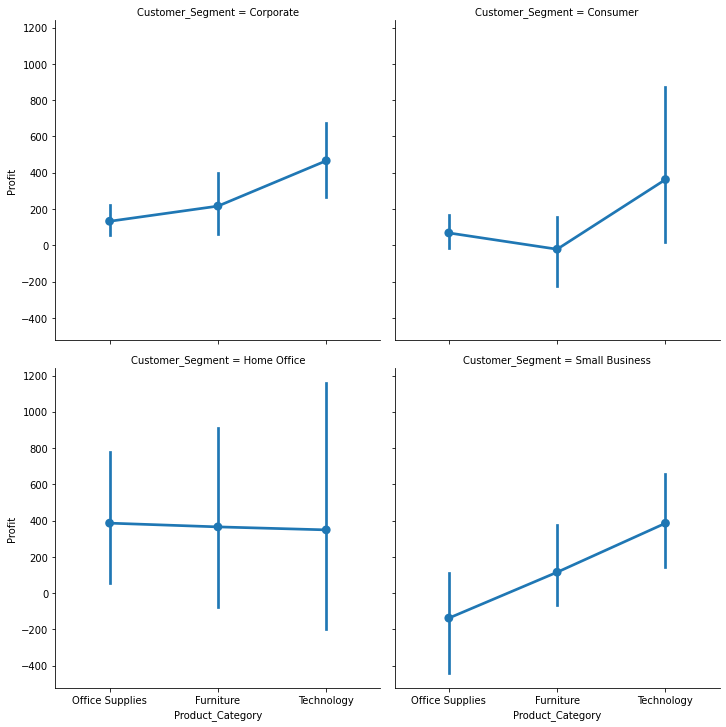

In [31]:
sns.catplot(x = 'Product_Category', y = 'Profit', data = sales, kind = 'point', col= "Customer_Segment", col_wrap=2)

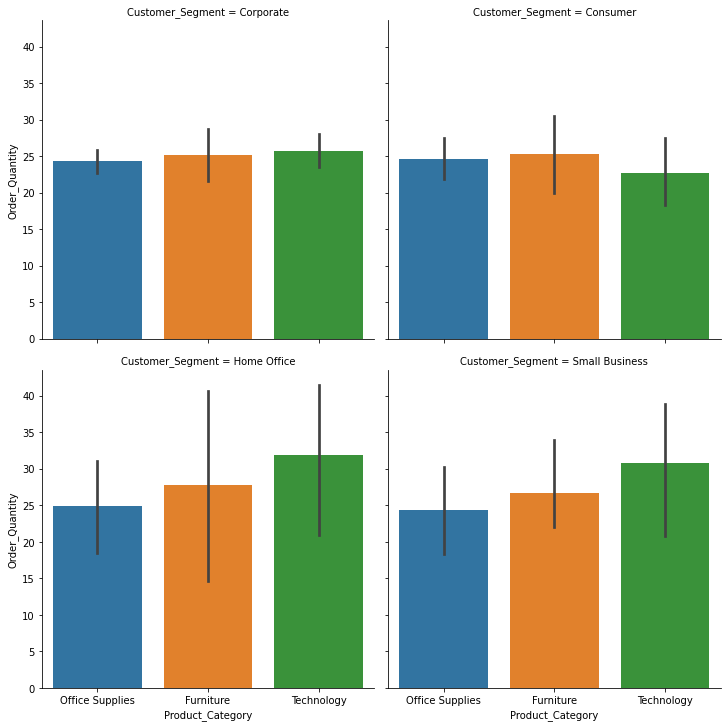

In [32]:
sns.catplot(x = 'Product_Category', y = 'Order_Quantity', data = sales, kind = 'bar', col= "Customer_Segment", col_wrap=2)

###PRODUCT CONTAINER WISE DISTRIBUTION OF PRODUCT CATEGORY AND SALES

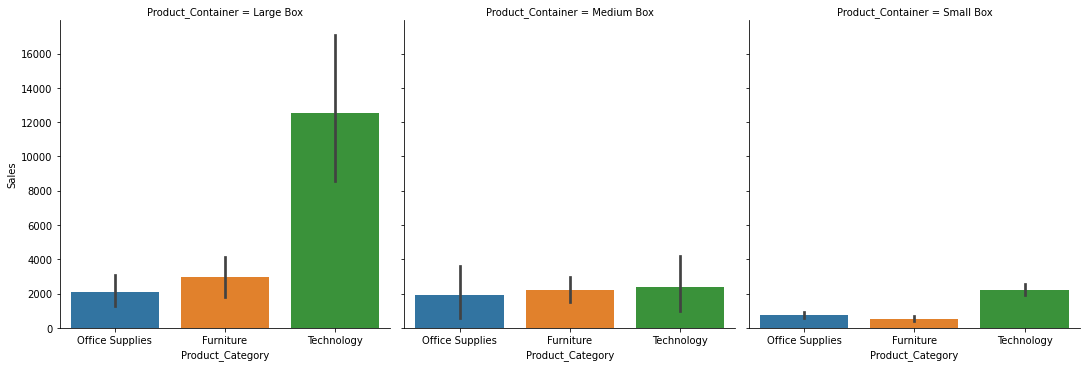

In [33]:
sns.catplot(x = 'Product_Category', y = 'Sales', data = sales, kind = 'bar', col= "Product_Container")

Products from small boxes have low sales while the technology products from large boxes have very high sales.

###SALES VS CUSTOMER SEGMENT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


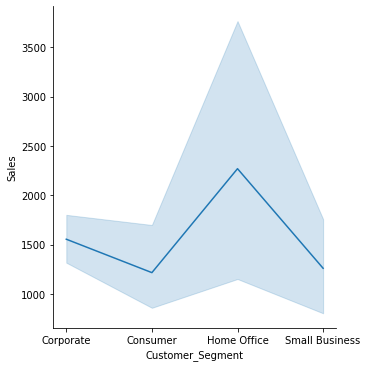

In [34]:
sns.relplot('Customer_Segment', 'Sales', data = sales, kind = 'line')

Though the highest number of purchases are from Corporate Sector, the highest sales are from Home Office Segment.

###SALES VS PRODUCT CATEGORY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


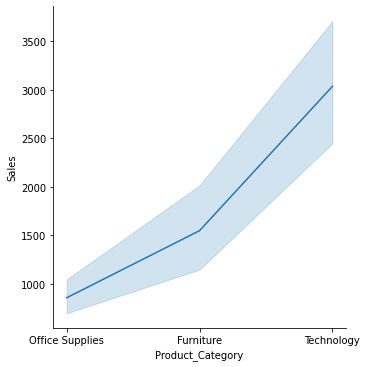

In [35]:
sns.relplot('Product_Category', 'Sales', data = sales, kind = 'line')

###PROFIT VS PRODUCT CATEGORY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


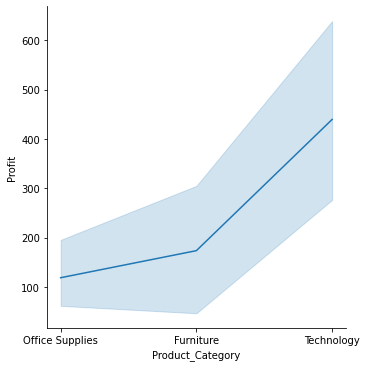

In [36]:
sns.relplot('Product_Category', 'Profit', data = sales, kind = 'line')

As observed, highest sales and profit are from Technology products.

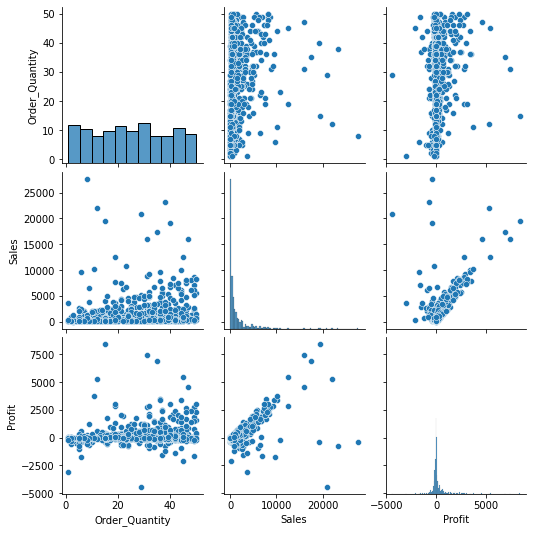

In [37]:
sns.pairplot(sales)